# Exercises XP Gold: W3_D2

## What You’ll Learn
- Eigenvectors/eigenvalues and how they reveal directions and magnitudes of linear transformations.
- Matrix normalization techniques (z-score and min–max) and why they matter in ML pipelines.
- Practical analytics: distribution analysis (histogram, skewness, kurtosis), simple time-series forecasting, and pandas aggregation.
- Multi-plot visualization with Matplotlib.

## What You’ll Create
- A 5×5 random matrix with eigen decomposition and normalized versions.
- A normally distributed dataset with histogram, skewness, and kurtosis.
- A simple linear-regression forecast on monthly sales data.
- Grouping/aggregation summaries with pandas.
- A 2×2 multi-plot layout (line, scatter, bar, and residuals histogram).

---

## Exercises

**Exercise 1 — Advanced Matrix Operations**  
Create a 5×5 random matrix.  
1) Compute **eigenvalues and eigenvectors**.  
2) **Normalize** the matrix (e.g., z-score and/or min–max).

**Exercise 2 — Statistical Distribution Analysis**  
Generate data from a **normal distribution**.  
- Plot a **histogram**.  
- Compute and interpret **skewness** and **excess kurtosis** (≈ 0 for ideal normal data).

**Exercise 3 — Time Series Forecasting**  
Given monthly sales (NumPy array), fit a **linear regression trend** (via `np.polyfit`) and **forecast** the next few months. Plot observed, fitted, and forecast points.

**Exercise 4 — Pandas Data Aggregation**  
Using a small DataFrame, demonstrate **groupby** and **pivot_table** to summarize sales by product and month.

**Exercise 5 — Complex Data Visualization**  
Create a **2×2 subplot grid** with different plot types (line, scatter, bar, residuals histogram). Use NumPy to generate data and Matplotlib to visualize.

## Setup — Imports and Random Seed

In [1]:
# Goal: Import core libraries and set a seed for reproducibility.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Optional SciPy for skewness/kurtosis (we will gracefully fallback if missing)
try:
    from scipy.stats import skew, kurtosis
    SCIPY_AVAILABLE = True
except Exception:
    SCIPY_AVAILABLE = False

np.random.seed(42)

## Exercise 1 : Advanced Matrix Operations

In [2]:
# Title: Exercise 1 — Eigenvalues/Eigenvectors and Matrix Normalization
# Goal: Create a 5x5 random matrix, compute eigenvalues/eigenvectors, then normalize the matrix.

# 1) Create a random 5x5 matrix
A = np.random.randn(5, 5)

# 2) Eigen decomposition
# Note: Eigenvalues/eigenvectors are defined for square matrices. For a general real matrix,
# eigenvalues can be complex; here, with a random real matrix, we may still get complex pairs.
eigvals, eigvecs = np.linalg.eig(A)

print("Matrix A:\n", np.round(A, 3))
print("\nEigenvalues:\n", np.round(eigvals, 6))
print("\nEigenvectors (columns correspond to eigenvalues):\n", np.round(eigvecs, 6))

# 3) Normalization
# Two common approaches:
#   a) Z-score normalization (zero mean, unit std) over all entries
#   b) Min-Max scaling to [0, 1] over all entries
mu = A.mean()
sigma = A.std(ddof=0)
Z = (A - mu) / sigma  # z-score normalization

A_min, A_max = A.min(), A.max()
MM = (A - A_min) / (A_max - A_min)  # min-max scaling to [0, 1]

print("\nZ-score normalized A (mean≈0, std≈1):\n", np.round(Z, 3))
print("\nMin-Max scaled A to [0,1]:\n", np.round(MM, 3))

# Notes (English):
# - Z-score normalization centers and scales; good for algorithms sensitive to scale (e.g., distance-based).
# - Min-Max preserves relative distances but rescales the range; useful for bounded features or visualization.

Matrix A:
 [[ 0.497 -0.138  0.648  1.523 -0.234]
 [-0.234  1.579  0.767 -0.469  0.543]
 [-0.463 -0.466  0.242 -1.913 -1.725]
 [-0.562 -1.013  0.314 -0.908 -1.412]
 [ 1.466 -0.226  0.068 -1.425 -0.544]]

Eigenvalues:
 [ 1.836748+0.j        0.654386+1.436848j  0.654386-1.436848j
 -1.797712+0.j       -0.482326+0.j      ]

Eigenvectors (columns correspond to eigenvalues):
 [[ 0.242978+0.j        0.640272+0.j        0.640272-0.j
  -0.314514+0.j        0.184427+0.j      ]
 [-0.923437+0.j       -0.033126+0.14496j  -0.033126-0.14496j
  -0.226615+0.j        0.441733+0.j      ]
 [-0.173168+0.j       -0.025906+0.367981j -0.025906-0.367981j
   0.642157+0.j       -0.657495+0.j      ]
 [ 0.219135+0.j        0.083126+0.37973j   0.083126-0.37973j
   0.272776+0.j        0.113416+0.j      ]
 [ 0.101088+0.j        0.057446-0.52674j   0.057446+0.52674j
   0.602456+0.j       -0.570698+0.j      ]]

Z-score normalized A (mean≈0, std≈1):
 [[ 0.704  0.027  0.866  1.799 -0.075]
 [-0.075  1.859  0.993 -0.326  0.

## Exercise 2 : Statistical Distribution Analysis

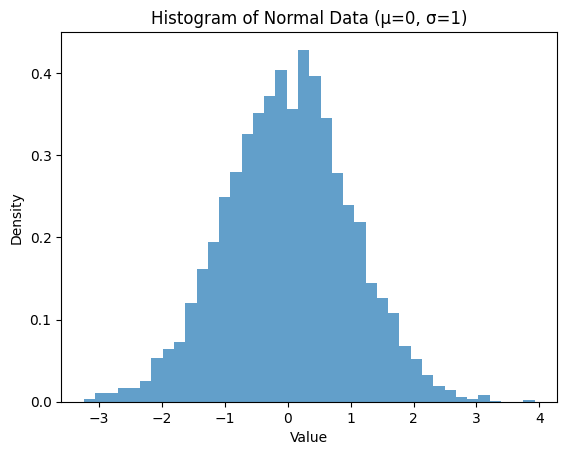

Skewness (≈0 for normal): -0.0112
Excess Kurtosis (≈0 for normal): 0.0421


In [3]:
# Title: Exercise 2 — Normal Dataset: Histogram, Skewness, Kurtosis
# Goal: Generate a normal dataset, visualize histogram, compute skewness and kurtosis.

# Generate data from Normal(mu, sigma)
mu, sigma = 0.0, 1.0
data = np.random.normal(mu, sigma, size=5000)

# Plot histogram
plt.figure()
plt.hist(data, bins=40, density=True, alpha=0.7)
plt.title("Histogram of Normal Data (μ=0, σ=1)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

# Skewness and kurtosis
if SCIPY_AVAILABLE:
    sk = skew(data, bias=True)                # 0 for perfectly symmetric normal
    kt = kurtosis(data, fisher=True, bias=True)  # excess kurtosis; 0 for normal
else:
    # Fallback implementations (sample-based, simple)
    x = data
    n = x.size
    xbar = x.mean()
    s = x.std(ddof=0)
    m3 = np.mean((x - xbar)**3)
    m4 = np.mean((x - xbar)**4)
    sk = m3 / (s**3 + 1e-12)
    # Excess kurtosis (Fisher) = m4/s^4 - 3
    kt = m4 / (s**4 + 1e-12) - 3.0

print(f"Skewness (≈0 for normal): {sk:.4f}")
print(f"Excess Kurtosis (≈0 for normal): {kt:.4f}")

# Interpretation (English):
# - Skewness close to 0 indicates symmetry around the mean.
# - Excess kurtosis close to 0 indicates tail heaviness similar to a normal distribution.

## Exercise 3 : Time Series Forecasting

Monthly sales (observed): [242 322 331 132 375 269 239 456 300 122 323 467]
Slope a: 7.252, Intercept b: 258.282
Forecast next 3 months: [345.3  352.55 359.81]


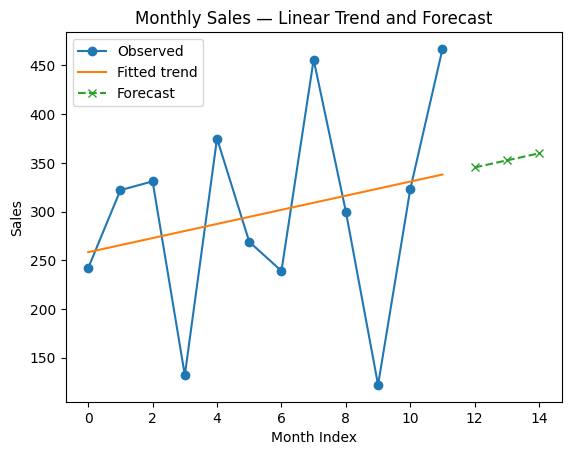

In [4]:
# Title: Exercise 3 — Time Series Forecast via Linear Regression (NumPy)
# Goal: Fit a linear trend to monthly sales and forecast next periods using np.polyfit.

# Generate monthly sales data (12 months)
monthly_sales_data = np.random.randint(100, 500, size=12)

# Fit linear regression on index vs value: y = a*x + b
t = np.arange(len(monthly_sales_data))  # 0..11
a, b = np.polyfit(t, monthly_sales_data, deg=1)  # slope a, intercept b

# Forecast next k months
k = 3
t_future = np.arange(len(monthly_sales_data), len(monthly_sales_data) + k)
forecast = a * t_future + b

print("Monthly sales (observed):", monthly_sales_data)
print(f"Slope a: {a:.3f}, Intercept b: {b:.3f}")
print(f"Forecast next {k} months:", np.round(forecast, 2))

# Plot observed vs fitted line and forecast
plt.figure()
plt.plot(t, monthly_sales_data, marker="o", label="Observed")
plt.plot(t, a*t + b, label="Fitted trend")
plt.plot(t_future, forecast, marker="x", linestyle="--", label="Forecast")
plt.title("Monthly Sales — Linear Trend and Forecast")
plt.xlabel("Month Index")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Notes (English):
# - This simple linear model captures an overall trend only (no seasonality).
# - For seasonality or more complex dynamics, consider ARIMA/ETS or ML models.

## Exercise 4 : Pandas Data Aggregation

In [5]:
# Title: Exercise 4 — Grouping and Aggregation in Pandas
# Goal: Summarize sales by product and month using groupby and pivot_table.

data = {
    'Product': ['Product A', 'Product B', 'Product C', 'Product A', 'Product B'],
    'Sales':   [200,          150,          300,          250,          180],
    'Month':   ['January',    'February',   'March',      'April',      'May']
}
df = pd.DataFrame(data)

# Groupby by product: total, mean, count
agg_product = df.groupby('Product')['Sales'].agg(total='sum', avg='mean', count='count')
print("Aggregation by Product:\n", agg_product, "\n")

# Groupby by month: total sales per month
agg_month = df.groupby('Month')['Sales'].sum().sort_index()
print("Aggregation by Month (sum):\n", agg_month, "\n")

# Pivot table: Products as rows, Months as columns
pivot = pd.pivot_table(df, values='Sales', index='Product', columns='Month', aggfunc='sum', fill_value=0)
print("Pivot Table (Sales):\n", pivot)

Aggregation by Product:
            total    avg  count
Product                       
Product A    450  225.0      2
Product B    330  165.0      2
Product C    300  300.0      1 

Aggregation by Month (sum):
 Month
April       250
February    150
January     200
March       300
May         180
Name: Sales, dtype: int64 

Pivot Table (Sales):
 Month      April  February  January  March  May
Product                                        
Product A    250         0      200      0    0
Product B      0       150        0      0  180
Product C      0         0        0    300    0


## Exercise 5 : Complex Data Visualization

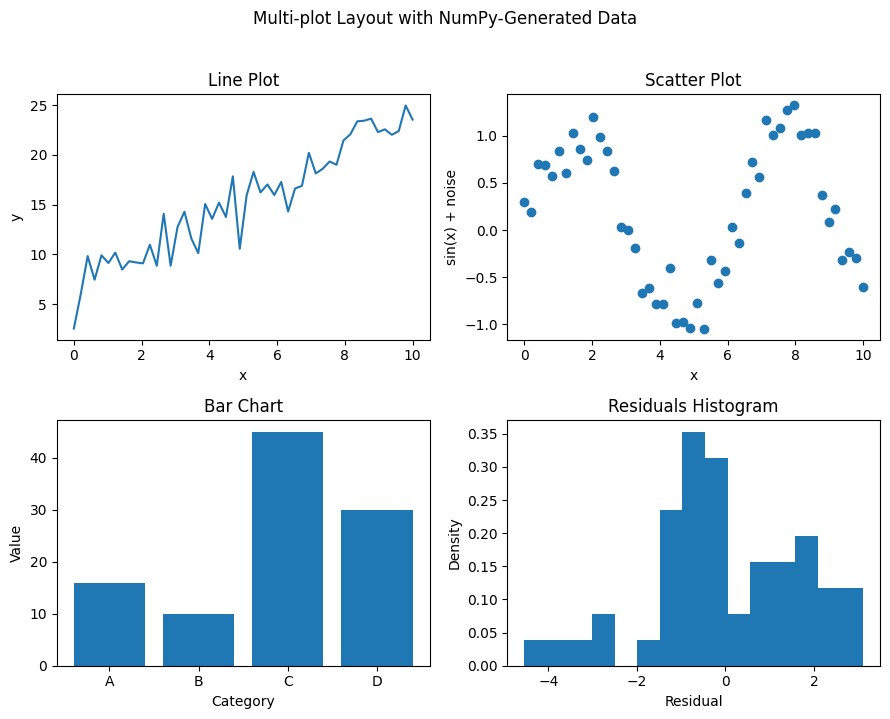

In [6]:
# Title: Exercise 5 — Multi-plot Layout (Line, Scatter, Bar)
# Goal: Create a 2x2 subplot grid with different plot types using NumPy-generated data.

# Prepare synthetic data
x = np.linspace(0, 10, 50)
y_line = 2.0 * x + 5 + np.random.randn(50) * 2.0
y_scatter = np.sin(x) + np.random.randn(50) * 0.2
cats = np.array(['A', 'B', 'C', 'D'])
bars = np.random.randint(10, 50, size=len(cats))

fig, axes = plt.subplots(2, 2, figsize=(9, 7))

# (1) Line plot
axes[0, 0].plot(x, y_line)
axes[0, 0].set_title("Line Plot")
axes[0, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")

# (2) Scatter plot
axes[0, 1].scatter(x, y_scatter)
axes[0, 1].set_title("Scatter Plot")
axes[0, 1].set_xlabel("x")
axes[0, 1].set_ylabel("sin(x) + noise")

# (3) Bar plot
axes[1, 0].bar(cats, bars)
axes[1, 0].set_title("Bar Chart")
axes[1, 0].set_xlabel("Category")
axes[1, 0].set_ylabel("Value")

# (4) Combined visualization: histogram of y_line residuals to best-fit line
# Compute residuals of a line fit to y_line
m, c = np.polyfit(x, y_line, deg=1)
residuals = y_line - (m*x + c)
axes[1, 1].hist(residuals, bins=15, density=True)
axes[1, 1].set_title("Residuals Histogram")
axes[1, 1].set_xlabel("Residual")
axes[1, 1].set_ylabel("Density")

fig.suptitle("Multi-plot Layout with NumPy-Generated Data", y=1.02)
plt.tight_layout()
plt.show()

## Conclusion & Key Takeaways — XP Gold (Eigenvectors, Normalization, Forecasting)

### Exercise 1 — Eigenvalues/Eigenvectors & Normalization
- **Eigenvalues/eigenvectors** reveal principal directions and stretch factors of linear maps.  
- **Z-score normalization** centers and scales to unit variance; **min–max scaling** preserves relative order while mapping to [0,1].  
- Normalization is essential for distance-based models and stable optimization.

### Exercise 2 — Distribution Analysis
- The **histogram** of simulated normal data should be symmetric and bell-shaped.  
- **Skewness ≈ 0** (symmetry) and **excess kurtosis ≈ 0** (normal tail thickness) validate normality.  
- Deviations hint at outliers, heavy tails, or sampling issues.

### Exercise 3 — Time-Series Forecast via Linear Trend
- A simple **linear regression** on indices captures the **overall trend** and allows short-horizon forecasts.  
- Useful as a baseline; real series may need **seasonality** or **autoregressive** models (ARIMA/ETS).

### Exercise 4 — Pandas Aggregation
- **groupby/agg** summarize key metrics (sum, mean, count) by categories.  
- **pivot_table** structures results by rows/columns for quick comparisons (e.g., product × month).

### Exercise 5 — Multi-plot Visualization
- Combining **line**, **scatter**, **bar**, and **residuals histogram** highlights different facets: trend, noise, category magnitudes, and model fit quality.  
- Residuals near zero mean with limited spread suggest a reasonable linear fit.

---

### Overall
- You practiced a compact analytics workflow: **linear algebra** (eig), **scaling**, **distribution checks**, **trend modeling**, **aggregation**, and **visual storytelling**.  
- Core tools: `numpy.linalg.eig`, `np.polyfit`, `scipy.stats` (or fallbacks), `pandas.groupby`, `pd.pivot_table`, and Matplotlib.

> **Next Steps:**  
> - Try **PCA** (eigendecomposition on covariance) for dimensionality reduction.  
> - Add **confidence intervals** to forecasts and perform **residual diagnostics**.  
> - Scale features consistently in end-to-end ML pipelines (train/val/test split).